In [1]:
import numpy as np
import json
from chrislib.data_util import load_image
import glob
import os
from intrinsic.pipeline import load_models, run_pipeline
import cv2

# load the models from the given paths
models = load_models('v2')

test_image = ("Test_Images/Test1.png")
# load an image (np float array in [0-1])


# run the model on the image using R_0 resizing


# Specify the directory path
directory_path = 'Test_Images_1/'

# Use glob to find all .png files in the directory and its subdirectories
png_files = glob.glob(os.path.join(directory_path, '**', '*.png'), recursive=True)

# Print all .png files
for file in png_files:
    image = load_image(file)
    if len(image.shape) == 2:
        print(f"Warning: Image '{file}' is grayscale (1 channel). Converting to 3-channel format.")
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    print(file)
   
    results = run_pipeline(models, image)

    albedo = results['hr_alb']
    alb_npy_file = file.replace('.png', '_albedo.npy')
    np.save(alb_npy_file, albedo)


    albedo_arr_list = albedo.tolist()
    albedo_jfile = file.replace('.png', '_albedo.json')
    with open(albedo_jfile, 'w') as json_file:
        print(albedo_jfile)
        json.dump(albedo_arr_list, json_file)


    diffuse_shading = results['dif_shd']
    dif_shd_npy_file = file.replace('.png', '_diffuse_shading.npy')
    np.save(dif_shd_npy_file, diffuse_shading)

    dif_shd_arr_list = diffuse_shading.tolist()
    dif_shd_jfile = file.replace('.png', '_diffuse_shading.json')
    with open(dif_shd_jfile, 'w') as json_file:
        print(dif_shd_jfile)
        json.dump(dif_shd_arr_list, json_file)

    
    residual = results['residual']
    residual_npy_file = file.replace('.png', '_residual.npy')
    np.save(residual_npy_file, residual)

    residual_arr_list = residual.tolist()
    residual_jfile = file.replace('.png', '_residual.json')
    with open(residual_jfile, 'w') as json_file:
        print(residual_jfile)
        json.dump(residual_arr_list, json_file)

   


/transfer/s5708799/ASE/programming-project-ofayed/Intrinsic Image Decomposition/Intrinsic/intrinsic_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in /home/s5708799/.cache/torch/hub/facebookresearch_WSL-Images_main
Using cache found in /home/s5708799/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /home/s5708799/.cache/torch/hub/facebookresearch_WSL-Images_main
Using cache found in /home/s5708799/.cache/torch/hub/facebookresearch_WSL-Images_main
Using cache found in /home/s5708799/.cache/torch/hub/facebookresearch_WSL-Images_main


Test_Images_1/20241121_111331369_iOS.png
Test_Images_1/20241121_111331369_iOS_albedo.json
Test_Images_1/20241121_111331369_iOS_diffuse_shading.json
Test_Images_1/20241121_111331369_iOS_residual.json
Test_Images_1/20241121_111656922_iOS.png
Test_Images_1/20241121_111656922_iOS_albedo.json
Test_Images_1/20241121_111656922_iOS_diffuse_shading.json
Test_Images_1/20241121_111656922_iOS_residual.json
Test_Images_1/20241201_114121174_iOS.png
Test_Images_1/20241201_114121174_iOS_albedo.json
Test_Images_1/20241201_114121174_iOS_diffuse_shading.json
Test_Images_1/20241201_114121174_iOS_residual.json
Test_Images_1/20241201_114123147_iOS.png
Test_Images_1/20241201_114123147_iOS_albedo.json
Test_Images_1/20241201_114123147_iOS_diffuse_shading.json
Test_Images_1/20241201_114123147_iOS_residual.json
Test_Images_1/20241201_114127539_iOS.png
Test_Images_1/20241201_114127539_iOS_albedo.json
Test_Images_1/20241201_114127539_iOS_diffuse_shading.json
Test_Images_1/20241201_114127539_iOS_residual.json
Test_

In [12]:
from chrislib.general import show, view, invert
import cv2
import torch

# import some helper functions from chrislib (will be installed by the intrinsic repo)
from chrislib.general import show, view, invert
from chrislib.data_util import load_from_url

# import model loading and running the pipeline
from intrinsic.pipeline import load_models, run_pipeline

image = load_image('Test_Images_1/20241121_111658039_iOS.png')

results = run_pipeline(models, image)
img = results['image']
alb = (results['hr_alb']) # gamma correct the estimated albedo
dif = (results['dif_shd']) # tonemap the diffuse shading
res = results['residual']

show([img, alb, dif, res], size=(30, 7))




# image = cv2.imread(test_image, cv2.IMREAD_UNCHANGED) 
# print_img = result['image']
# #show([image, albedo, diffuse_shading, residual])
# print(albedo)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.841334879398346..4.282511234283447].


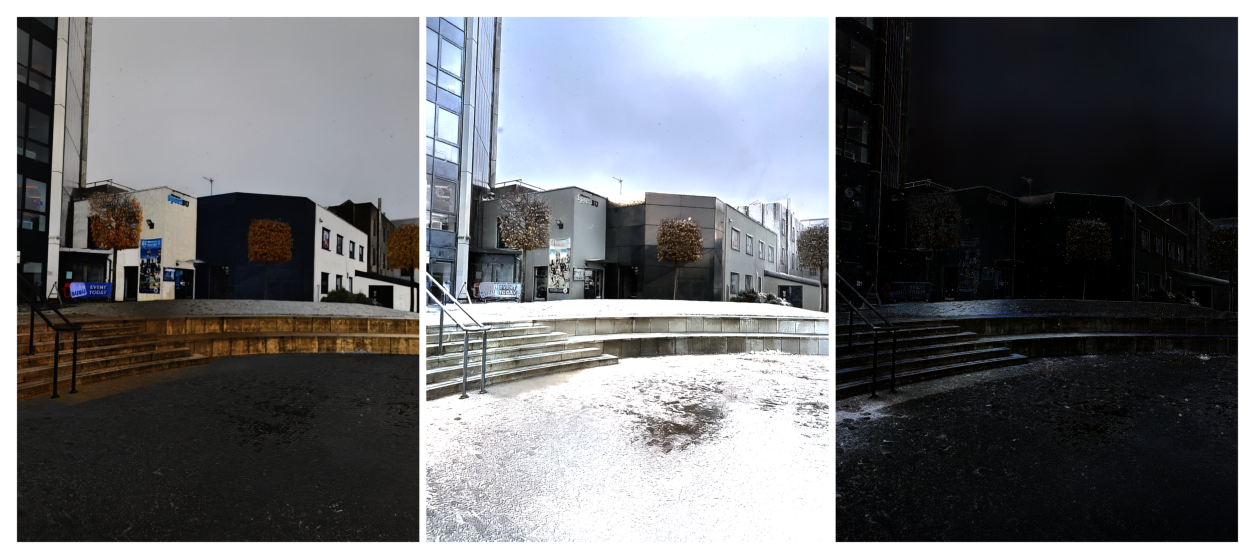

In [10]:
import json
import numpy as np
from chrislib.general import show, view, invert
img = cv2.imread('Test_Images_1/20241121_111658039_iOS.png', cv2.IMREAD_UNCHANGED)
# Load the JSON file
with open('Test_Images_1/20241121_111658039_iOS_albedo.json', 'r') as file:
    alb = json.load(file)
    albedo = np.array(alb)
    
with open('Test_Images_1/20241121_111658039_iOS_diffuse_shading.json', 'r') as file:
    dif = json.load(file)
    diffuse_shading = np.array(dif)

with open('Test_Images_1/20241121_111658039_iOS_residual.json', 'r') as file:
    res = json.load(file)
    residual = np.array(res)

show([albedo, diffuse_shading, residual], size=(30, 7))